### IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Reading data on Investment Rounds in 2008-18 from investments input
 

In [2]:
#Reading Total Investments Data for all Companies in the sector between 2008-18

df_inv = pd.read_csv('./input_data/investmentInput.csv')

df_inv.head(3)

,Year,Org_Name,Funding_Round_Type,Funding_Amt_USD,Funding_Stage
0,2018,Zelros,Series A,4532800,Early Stage
1,2018,Axyon AI,Series Unknown,1473160,Uncategorized
2,2018,Oriente,Series A,105000000,Early Stage


### 2. Extracting data Year on Year Funding Rounds and Funding amounts data dataframe

In [3]:
# Grouping by Year
funding_groupedby_year = df_inv.groupby(by='Year',axis=0)

# Extracting Funding Rounds count to series
rounds_count_ser = funding_groupedby_year['Org_Name'].count()

# Extracting Total Funding Amount to series
funding_amt_ser = funding_groupedby_year['Funding_Amt_USD'].sum()

In [4]:
#  Creating dataframe
funding_df = pd.DataFrame({
                            'Funding_Rounds': rounds_count_ser,
                            'Funding_Amt_USD': funding_amt_ser
                          })

# Resetting index

funding_df.reset_index(drop=False, inplace=True)

In [5]:
funding_df.head(3)

,Year,Funding_Rounds,Funding_Amt_USD
0,2008,1,5020000
1,2009,1,365275
2,2010,5,1640384


###  3. Plotting  YoY Total Funding Amount and Funding Rounds Trends

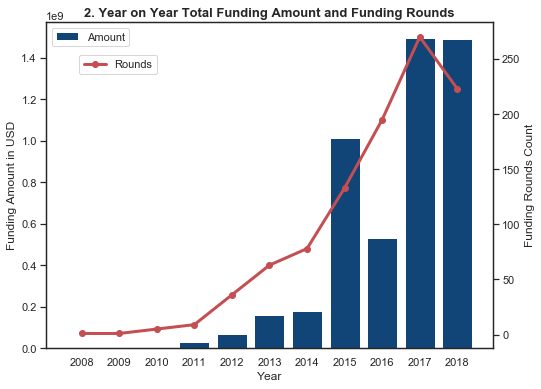

In [6]:
plotTitle = '2. Year on Year Total Funding Amount and Funding Rounds'

sns.set(style="white", rc={"lines.linewidth": 3})

plt.subplots(figsize = (8, 6))

plt.xticks(np.arange(start=2008, stop=2019, step=1))

ax = sns.barplot(x='Year',
                 y='Funding_Amt_USD',
                 data=funding_df,
                 color='#004488',
                 label='Amount'
                )

ax2 = ax.twinx()



ax2.plot(ax.get_xticks(), funding_df['Funding_Rounds'], color='r', marker='o', label='Rounds')

ax.set_title(plotTitle,fontdict={'fontsize':13,'fontweight':'bold'})
ax.legend() 
ax2.legend(borderaxespad=3)
ax.set(xlabel='Year', ylabel='Funding Amount in USD')
ax2.set(ylabel='Funding Rounds Count')
sns.set()


#Saving to output png file

plt.savefig('./output/plots/2_YoY-Total_Funding_Rounds.png', dpi=100)

### 4. Saving results to file

In [7]:
# Writing data to output excel file

from openpyxl import load_workbook

book = load_workbook('./output/outputData.xlsx')

writer = pd.ExcelWriter('./output/outputData.xlsx', engine='openpyxl')

writer.book = book

writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

funding_df.to_excel(writer,'2.YoY_Total_Funding_Rounds', index=False)

writer.save()

### 5. Deleting dataframes, series to deallocate memory

In [8]:
del df_inv
del funding_groupedby_year
del funding_df